![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Q1. [LeetCode 73: Set Matrix Zeroes](https://leetcode.com/problems/set-matrix-zeroes/); Difficulty: ${\color{orange}{Medium}}$

## Description

Given an `m x n` integer matrix `matrix`, if an element is `0`, set its entire row and column to `0`'s.

You must do it **in place.**

**Example 1**:

- **Input**: `matrix = [[1,1,1],[1,0,1],[1,1,1]]`
- **Output**: `[[1,0,1],[0,0,0],[1,0,1]]`

**Example 2**:

- **Input**: `matrix = [[0,1,2,0],[3,4,5,2],[1,3,1,5]]`
- **Output**: `[[0,0,0,0],[0,4,5,0],[0,3,1,0]]`


**Constraints**:

- `m == matrix.length`
- `n == matrix[0].length`
- `1 <= m, n <= 200`
- $-2^{31} <= matrix[i][j] <= 2^{31} - 1$


**Follow up**:

- A straightforward solution using $O(mn)$ space is probably a bad idea.
- A simple improvement uses $O(m + n)$ space, but still not the best solution.
- Could you devise a constant space solution?

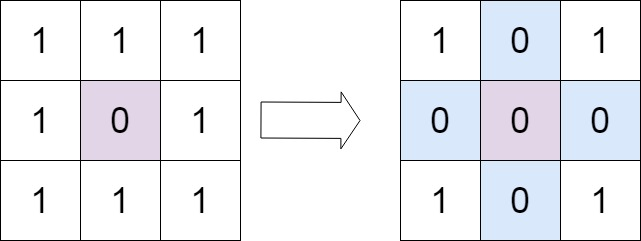

In [ ]:
# Example 1

from IPython import display
display.Image("data/images/04-Strivers-SDE-Sheet/Day_01_Arrays-01.jpg")

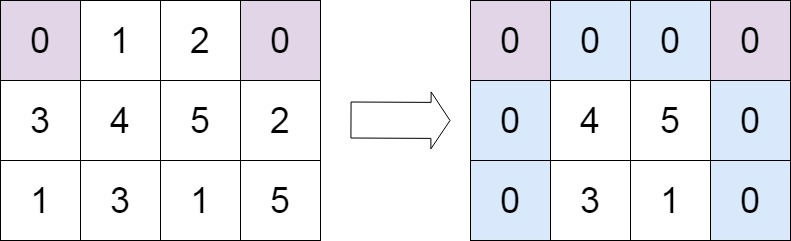

In [ ]:
# Example 2

from IPython import display
display.Image("data/images/04-Strivers-SDE-Sheet/Day_01_Arrays-02.jpg")

## Solution 1: Brute Force Approach

**Logic:**

- First, we will use a nested for loop to traverse all the cells of the matrix.
- If any cell `(i,j)` contains the value 0, we will mark all cells in row `i` and column `j` with `None` except those which contain 0.
- We will perform Step 2 for every cell containing 0.
- Finally, we will mark all the cells containing `None` with 0.
- Thus the given matrix will be modified according to the question.

In [ ]:
class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        m = len(matrix)
        n = len(matrix[0])

        def mark_row(row):
            for j in range(0, n):
                if matrix[row][j] != 0:
                    matrix[row][j] = None

        def mark_column(col):
            for i in range(0, m):
                if matrix[i][col] != 0:
                    matrix[i][col] = None

        for row in range(0, m):
            for col in range(0, n):
                if matrix[row][col] == 0:
                    # Mark rows and columns with None
                    mark_row(row)
                    mark_column(col)

        # Replace all None values with 0
        for i in range(0, m):
            for j in range(0, n):
                if matrix[i][j] == None:
                    matrix[i][j] = 0

## Time & Space Complexity of Solution 1

- Time Complexity:
    - 1 Nested for loop of $m \times n \times (m+n)$ iterations in worst case with each iteration taking $O(1)$ time $\implies$ Time Complexity = $O(m \times n \times (m+n))$
    - 1 Nested for loop of $m \times n$ iterations in worst case with each iteration taking $O(1)$ time $\implies$ Time Complexity = $O(m \times n)$
    - Hence, Total Time Complexity = $O(m \times n \times (m+n)) + O(m \times n)$ = $O(m \times n \times (m+n))$ $\approx O(n^3)$
- Space Complexity:
    - Extra variables `m, n, i, j, row, col` of constant space $\implies$ Space Complexity = $O(1)$

## Solution 2: Better Approach

**Logic:**

- Find rows and columns corresponding to the positions of zeroes & store them in set `rows` and set `cols`
- For each `row` in `rows`
    - Set entire row to zero
- For each `col` in `cols`
    - Set entire column to zero

In [ ]:
class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        m = len(matrix)
        n = len(matrix[0])

        # Find rows and columns corresponding to the positions of zeroes
        rows, cols = set(), set()
        for i in range(0, m):
            for j in range(0, n):
                if matrix[i][j] == 0:
                    if i not in rows:
                        rows.add(i)
                    if j not in cols:
                        cols.add(j)

        for i in rows:
            # Set entire row to zero
            for j in range(0, n):
                matrix[i][j] = 0

        for j in cols:
            # Set entire column to zero
            for i in range(0, m):
                matrix[i][j] = 0

## Time & Space Complexity of Solution 2

- Time Complexity:
    - 3 Nested for loops each of $m \times n$ iterations with each iteration taking $O(1)$ time $\implies$ Time Complexity = $O(m \times n)$ $\approx O(n^2)$
- Space Complexity:
    - Extra set `rows` of worst case space $m$ and set `cols` of worst case space $n$ $\implies$ Space Complexity = $O(m+n)$ $\approx O(n)$

**Note**

- Extra variables `m, n, i, j` of constant space can be ignored.

## Solution 3: Optimal Approach

**Logic:**

- Use first row and first column to indicate which rows and columns need to be made zeroes
- `first_row_zero` is made `True` if first row has atleast one zero
- `first_col_zero` is made `True` if first column has atleast one zero
- Zero out cells (except those in first row and first column) based on markers
- We handle the first row and first column last to avoid overwriting marker data
    - Zero out the first row if `first_row_zero == True`
    - Zero out the first column if `first_col_zero == True`

In [ ]:
class Solution:
    def setZeroes(self, matrix: List[List[int]]) -> None:
        """
        Do not return anything, modify matrix in-place instead.
        """
        m = len(matrix)
        n = len(matrix[0])

        # Approach: Use first row and first column to indicate
        # which rows and columns need to be made zeroes

        # Variables to track if the first row and first column need to be zeroed
        first_row_zero = False
        first_col_zero = False

        # Check if the first row has any zeros
        for j in range(0, n):
            if matrix[0][j] == 0:
                first_row_zero = True
                break

        # Check if the first column has any zeros
        for i in range(0, m):
            if matrix[i][0] == 0:
                first_col_zero = True
                break

        # Use first row and first column as markers
        for i in range(1, m):
            for j in range(1, n):
                if matrix[i][j] == 0:
                    # Set element in first row to zero
                    matrix[0][j] = 0
                    # Set element in first column to zero
                    matrix[i][0] = 0

        # Zero out cells based on markers
        for i in range(1, m):
            if matrix[i][0] == 0:
                for j in range(1, n):
                    matrix[i][j] = 0

        for j in range(1, n):
            if matrix[0][j] == 0:
                for i in range(1, m):
                    matrix[i][j] = 0

        # Zero out the first row if needed
        if first_row_zero:
            for j in range(0, n):
                matrix[0][j] = 0

        # Zero out the first column if needed
        if first_col_zero:
            for i in range(0, m):
                matrix[i][0] = 0

## Time & Space Complexity of Solution 3

- Time Complexity:
    - 1st for loop of $n$ iterations with each iteration taking $O(1)$ time $\implies$ Time Complexity = $O(n)$
    - 2nd for loop of $m$ iterations with each iteration taking $O(1)$ time $\implies$ Time Complexity = $O(m)$
    - 3rd, 4th & 5th for loops each of $m \times n$ iterations with each iteration taking $O(1)$ time $\implies$ Time Complexity = $O(3 \times m \times n)$ = $O(m \times n)$
    - 6th for loop of $n$ iterations with each iteration taking $O(1)$ time $\implies$ Time Complexity = $O(n)$
    - 7th for loop of $m$ iterations with each iteration taking $O(1)$ time $\implies$ Time Complexity = $O(m)$

    - Total Time Complexity = $O(n) + O(m) + O(m \times n) + O(n) + O(m) = O(m \times n)$ $\approx O(n^2)$
- Space Complexity:
    - Extra variables `m, n, i, j, first_row_zero, first_col_zero` of constant space $\implies$ Space Complexity = $O(1)$

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Q2. [LeetCode 118: Pascal's Triangle](https://leetcode.com/problems/pascals-triangle/); Difficulty: ${\color{orange}{Medium}}$

## Description

Given an integer `numRows`, return the first numRows of **Pascal's triangle.**

In **Pascal's triangle**, each number is the sum of the two numbers directly above it as shown:

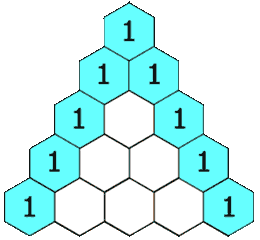

In [1]:
# Pascal's triangle

from IPython import display
display.Image("data/images/04-Strivers-SDE-Sheet/Day_01_Arrays-03.gif")

**Example 1**:

- **Input**: `numRows = 5`
- **Output**: `[[1],[1,1],[1,2,1],[1,3,3,1],[1,4,6,4,1]]`

**Example 2**:

- **Input**: `numRows = 1`
- **Output**: `[[1]]`


**Constraints**:

- `1 <= numRows <= 30`

## Solution 1: Brute Force Approach

**Logic:**

- For each row, we first set `current_row` as a list of 1's.
- Then, we modify all elements in `current_row` except the first & last by adding consecutive elements in `prev_row`.
- We append `current_row` in each iteration to `pascals_triangle` list.

In [ ]:
class Solution:
    def generate(self, numRows: int) -> List[List[int]]:
        pascals_triangle = []
        prev_row = None
        for row in range(1, numRows+1):
            current_row = [1 for i in range(0, row)]
            if row >= 3:
                prev_row_idx = 0
                for idx in range(1, row-1):
                    current_row[idx] = prev_row[prev_row_idx] + prev_row[prev_row_idx+1]
                    prev_row_idx += 1

            pascals_triangle.append(current_row)
            prev_row = current_row

        return pascals_triangle

## Time & Space Complexity of Solution 1

- Time Complexity:
    - 1 Nested for loop of $n \times (n-2)$ iterations with each iteration taking $O(1)$ time $\implies$ Time Complexity = $O(n \times (n-2))$ $\approx O(n^2)$
- Space Complexity:
    - Extra list of lists `pascals_triangle` of worst case space $\frac {n \times (n+1)}{2}$ $\implies$ Space Complexity = $O(\frac {n \times (n+1)}{2})$ $\approx O(n^2)$

**Note**

- Extra variables `row, i, idx, prev_row_idx` of constant space can be ignored.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

# Q3. Single element of the Pascal's Triangle; Difficulty: ${\color{orange}{Medium}}$

## Description

Given the row R and column C of the **Pascal's triangle,** return the element.

**Example 1**:

- **Input**: `R = 5, C = 3`
- **Output**: `6`

**Example 2**:

- **Input**: `R = 6, C = 4`
- **Output**: `10`

## Solution 1: Brute Force Approach

**Logic:**

- Element at $R^{th}$ row and $C^{th}$ column of the Pascal's triangle = no of combinations given by $\mathrm{C}_{C-1}^{R-1}$.
- $\mathrm{C}_{C-1}^{R-1} = \frac{(R-1)!}{(C-1)!(R-C)!}$
- We find each of the 3 factorials separately and use them to find $\mathrm{C}_{C-1}^{R-1}$.

In [ ]:
class Solution:
    def get_element(self, R: int, C: int) -> int:
        def factorial(n):
            if n == 0:
                return 1
            else:
                return n * factorial(n-1)

        return factorial(R-1) // (factorial(C-1) * factorial(R-C))

## Time & Space Complexity of Solution 1: TBD

- Time Complexity:
    - `factorial(n)` takes $O(n)$ time
    - `factorial(R-1)` takes $O(R-1)$ time
    - `factorial(C-1)` takes $O(C-1)$ time
    - `factorial(R-C)` takes $O(R-C)$ time
    - Time Complexity = $O((R-1) \times (C-1) \times (R-C))$ $\approx O(n^2)$
- Space Complexity:
    - `factorial(n)` takes $O(n)$ space in function call stack
    - Extra list of lists `pascals_triangle` of worst case space $\frac {n \times (n+1)}{2}$ $\implies$ Space Complexity = $O(\frac {n \times (n+1)}{2})$ $\approx O(n^2)$

**Note**

- Extra variables `row, i, idx, prev_row_idx` of constant space can be ignored.

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)

Difficulty: ${\color{green}{Easy}}$
Difficulty: ${\color{orange}{Medium}}$
Difficulty: ${\color{red}{Hard}}$

In [ ]:
# Deep Learning as subset of ML

from IPython import display
display.Image("data/images/DL_01_Intro-01-DL-subset-of-ML.jpg")

![rainbow](https://github.com/ancilcleetus/My-Learning-Journey/assets/25684256/839c3524-2a1d-4779-85a0-83c562e1e5e5)